In [1]:
# import time
# import math
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from itertools import combinations
# # from functools import partial
from multiprocessing import Pool
from functools import partial
from sklearn import metrics
# import ipywidgets as widgets
# from ipywidgets import Layout
# from IPython.display import clear_output
# import datetime
# import itertools
# # from sklearn.model_selection import train_test_split
# from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib as mpl
# from matplotlib.ticker import LinearLocator, FormatStrFormatter
# import matplotlib.patheffects as pe
# %matplotlib notebook

# ## Personal Modules
import ReadStandardTimeFill as RSTF
# import importlib
import DenseNet as Dense
# import MiscFuncs as MF
# importlib.reload(Dense)
# importlib.reload(RSTF)
# importlib.reload(MF)

# # %matplotlib inline
# %config IPCompleter.greedy=True

# import scipy
# from scipy.optimize import minimize, curve_fit
# from scipy.stats import norm
# # from sklearn.externals 
import joblib
# from matplotlib import cm

# import matplotlib as mpl
# mpl.rcParams["mathtext.default"] = 'regular'

from scipy import stats
import statsmodels.api as sm

from ipywidgets import FloatProgress
from IPython.display import display
# import os  
# import shutil
# from keras import backend as K
try:pool.close()
except:pass

# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

# from ipywidgets import FloatProgress, HTML


Using TensorFlow backend.


In [2]:

# def t(p,n):
#     alpha = 1-p
#     df = n-1
#     return(stats.t.ppf(alpha,df))

pd.set_option('max_colwidth',200)
MP=True

cwd = os.getcwd()
# def Performance(ax,title,target,verbose,lim=None):
#     ax.bar(target.level_best['Size'].values,target.level_best['MSE'].values,
#             yerr=target.level_best['SE'].values*target.Rule,color='grey',
#             alpha = .8,label='Best model at\neach size')
#     ax.bar(target.Best['Size'].values,target.Best['MSE'].values,
#            yerr=target.Best['SE'].values*target.Rule,
#            color='red',alpha = 1,label='Parsimony')
#     yaxy = ax.twiny()
#     yaxy.bar(target.level_best['Size'].values,target.level_best['MSE'].values,
#              yerr=target.level_best['SE'].values*target.Rule,
#              color='grey',
#              alpha = 0,label=None)
#     yaxy.set_xlabel('Number of Factors')
#     ax.set_xlabel('Additional Model Input')
#     ax.set_title(title,y=1.1,loc='left')
#     ax.plot([target.level_best['Size'].min(),target.level_best['Size'].max()],
#             [target.Min['MSE'].values[0]+target.Min['SE'].values[0]*target.Rule,
#             target.Min['MSE'].values[0]+target.Min['SE'].values[0]*target.Rule])
#     plt.sca(ax)
#     plt.grid()
#     if lim is not None:
#         ax.set_xlim(lim)
#         yaxy.set_xlim(lim)
    
#     i=1
#     Labs = []
#     for mod in target.level_best.Model.unique():
#         print(i,mod)
#         if i >1:
#             Labs.append([val for val in mod.split('+') if val not in modold.split('+')][0])
#         else:
#             Labs.append(mod)
#         modold=mod
#         i+=1
#     labels = []
#     for lab in Labs:
#         labels.append(aliases[lab])
#     plt.xticks(target.level_best['Size'],labels,rotation=90)
#     if verbose>1:
#         print(target.Best)
    
# def LevelPerformance(ax,title,target,level=1,Rule=1):
#     Data = target.Records.loc[target.Records['Size']==level].sort_values('MSE').reset_index()
    
#     if level == 1:
#         Data['Name']=Data['Model']
#         for val in Data['Model']:
#             Data.loc[Data['Model']==val,'Name']=aliases[val]
#         Min = Data[Data['MSE']==Data['MSE'].min()]
#         Myax = Min['MSE'].values[0]+Min['SE'].values[0]*Rule
#         Best = Data[Data['MSE']<=Myax]
#         ax.bar(Data['Name'],Data['MSE'].values,
#                yerr=Data['SE'].values*target.Rule,
#                color='grey',
#             alpha = .8,label='Best model at\neach size')
#         ax.bar(Best['Name'],Best['MSE'].values,
#                yerr=Best['SE'].values*target.Rule,
#                color='red',
#                alpha = 1,
#                label='Parsimony')
#         ax.bar(Min['Name'],Min['MSE'].values,
#                yerr=Min['SE'].values*target.Rule,
#                color='blue',
#                alpha = 1,
#                label='Parsimony')
#     else:
# #         alpha = .025
#         Min = Data[Data['MSE']==Data['MSE'].min()]
#         Myax = Min['MSE'].values[0]+Min['SE'].values[0]*Rule
#         Best = Data[Data['MSE']<= Myax]
#         ax.bar(Data.index,Data['MSE'].values,
#                yerr=Data['SE'].values*target.Rule,
#                color='grey',
#             alpha = .8,label='Best model at\neach size')
#         ax.bar(Best.index,Best['MSE'].values,
#                yerr=Best['SE'].values*target.Rule,
#                color='red',alpha = 1,label='Parsimony')
#         ax.bar(Min.index,Min['MSE'].values,
#                yerr=Min['SE'].values*target.Rule,
#                color='blue',alpha = 1,label='Parsimony')
#     ax.plot([Data.index[0],Data.index[-1]],[Myax,Myax])
#     ax.grid()
#     print(Data)

def Mapper(AllData,target,name,Fill=False,DarkTarget=None):
    target.Project(Projector = None,
                Model = None)
    if DarkTarget is None:
        target.RST.Data = AllData
    else:
        target.RST.Data = DarkTarget
    print(target.params['target'],target.params['Inputs'],
                       target.params['Spath'])
    if DarkTarget is None:
        target.RST.Scale(target.params['target'],target.params['Inputs'],
                       ScalePath=target.params['Spath'],Project=True)
    else:
        target.RST.Data = DarkTarget
        target.RST.Scale(target.params['target'],target.params['Inputs'],
                   ScalePath=target.params['Spath'],Project=True,fillTarget = DarkTarget)
    target.Map(Fill)
    AllData[name] = target.Data_Map[target.target].values
#     print(AllData[name])
    AllData[name+'_Var_reg'] = target.Data_Map['Var_reg'].values
    AllData[name+'_Var_er'] = target.Data_Map['Var_er'].values
    AllData[name+'_CI'] = target.Data_Map['CI'].values
    AllData[name+'_PI'] = target.Data_Map['PI'].values
    return(AllData)

def PooledVar_interval(Data,Vars,mean,n): 
    Ux = 1/(Data[Vars].count(axis=0).sum())*(Data[Vars].count(axis=0)*Data[Vars].mean(axis=0)).sum()
    P1 = ((Data[Vars].count(axis=0)-1)*Data[Vars].std(axis=0)**2+Data[Vars].count(axis=0)*Data[Vars].mean(axis=0)**2).sum()
    P2 = Data[Vars].count(axis=0).sum()*Ux**2
    VarX = 1/(Data[Vars].count(axis=0)-1).sum()*(P1-P2)
    SigmaX = (VarX)**.5
    return(SigmaX)

class ResultMap:
    def __init__(self,Path,target,Test='N/A',Rule=1,alpha = .025,DataName ='AllData.csv',
                 AltPath=None,Scope='Full',FPVars=None):
        self.FPVars = FPVars
        self.target = target        
#         self.params = Dense.Params(Path,'Full',self.target,MP)

        self.params = Dense.Params(Path,Scope,target,MP=MP)
        self.params['Dpath'] = Path
#         self.RST = RSTF.ReadStandardTimeFill(self.params,DataName,FPVars = FPVars)
        
        self.RST = RSTF.ReadStandardTimeFill(Path+DataName, self.params['Spath'])
        if AltPath is None:
            self.Records = pd.read_csv(self.params['Dpath']+'/'+target+'_Runs.csv',delimiter = ',',header = 0,index_col=[0])
            self.params['Dpath'] += target+'/'
        else:
            self.Records = pd.read_csv(self.params['Dpath']+'/'+AltPath+'_Runs.csv',delimiter = ',',header = 0,index_col=[0])
            self.params['Dpath'] += AltPath+'/'           
        self.Records['Model_Key']=self.Records['Size'].astype(str)+'_'+self.Records['Nodes'].astype(str)
        self.Records['RMSE']=self.Records['MSE']**.5
        self.Min = self.Records.loc[self.Records['MSE']==self.Records['MSE'].min()]
        self.Best = self.Records.loc[self.Records.index==Rule]
        self.Model_Selection = self.Best['Model'].values[0]
                
    def Project(self,Projector = None,Model = None):
        if Model ==  None:
            self.Model = self.Model_Selection
        else:
            self.Model = Model
        idx = self.Records['Model_Key'].loc[self.Records['Model']==self.Model].values[0]
        self.params['Spath']=(self.params['Dpath']+idx+'/')
        self.params['Inputs'] = self.Model.split('+')
        self.RST.Scale(self.params['target'],self.params['Inputs'],ScalePath=self.params['Spath'])
        if Projector != None:
            if Projector['Map'] == None:
                for ip,val in zip(Projector['Assign']['input'],Projector['Assign']['value']):                    
                    self.RST.Data[ip] = val
            else:
                for ip in self.params['Inputs']:
                    self.RST.Data[ip] = self.RST.Data[ip].mean()
                for ip,val in zip(Projector['Map']['input'],Projector['Map']['min'],Projector['Map']['max']):                    
                    self.RST.Data[ip] = val
                
            self.RST.Scale(self.params['target'],self.params['Inputs'],ScalePath=self.params['Spath'],Project=True)
            
    def Map(self,Fill=False,Map=True):
        if Fill == True:
            X = self.RST.X_fill
        else:
            X = self.RST.X
        self.params['Sname']='Y_'
        Y_fill = []
        MSE = []
        prog1 = FloatProgress(min=0, max=self.params['K'],description='Running:')
        display(prog1)
        self.Weights=[]
        if __name__ == "__main__":
            pool = Pool(processes=3,maxtasksperchild=75)
            for k,results in enumerate(pool.imap(partial(Dense.Load_Model,X=X,params=self.params),
                                                 range(self.Best['K'].values[0]))):
                prog1.value+=1
                Y = results[0]
                self.Weights.append(results[1])
#                 print(Y)
                Yold = Y+0
                Y = self.RST.YScaled.inverse_transform(Y)
                if Fill == False and Map == False:
                    mse = (metrics.mean_squared_error(self.RST.y,Y))
                    MSE.append(mse)
                Y_fill.append(Y)
            pool.close()
        Y_fill = np.asanyarray(Y_fill).mean(axis=-1)
        Y_fill_bar = Y_fill.mean(axis=0)
        YTru = self.RST.y+0.0
        if Fill == False and Map == False:
            self.MSE = np.asanyarray(MSE)
            self.CI = stats.t.ppf(1-0.025,k)*self.MSE.std()/(k)**.5
        YStandard = joblib.load(self.params['Spath']+"YVar_scaler.save") 
        self.params['Sname']='Var'
        self.params['Loss']='Boot_Loss'
        
        for k in range(0,1):
            results=Dense.Load_Model(k,X=X,params=self.params)
            YVar = results[0]
            YVar = YStandard.inverse_transform(YVar)                    
        X_back = np.squeeze(self.RST.XScaled.inverse_transform(X))
        self.Data_Map = pd.DataFrame(data=X_back,columns=self.params['Inputs'])
        try:
            self.Data_Map['key'] = self.RST.Data['key'].values
        except:
            pass
        self.Data_Map[self.target] = np.squeeze(Y_fill_bar)
        if Map == False:
            self.Data_Map['True'] = YTru
        self.Data_Map['Var_reg'] = 1/(self.params['K']-1)*((Y_fill-Y_fill_bar)**2).sum(axis=0)
        self.Data_Map['Var_er'] = np.squeeze(YVar)
        self.Data_Map['SE'] = self.Data_Map['Var_reg']**.5
        self.T = stats.t.ppf(1-0.025,self.params['K'])
        self.Data_Map['CI']=self.T*self.Data_Map['SE']
        self.Data_Map['PI']=self.T*((self.Data_Map['Var_er']+self.Data_Map['Var_reg'])**.5)
        self.Y_fill = Y_fill
        self.Y_fill_bar = Y_fill_bar

In [3]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def RecRead(Path):
    AllRes={}
    for f in ['fco2','fch4']:#,'ER']:
        try:
            AllRes[f]={}
            AllRes[f]['Records']=pd.read_csv(Path+f+'_Runs.csv',index_col=0)
            AllRes[f]['Results']=pd.read_csv(Path+f+'_Results.csv',index_col=0)
            AllRes[f]['Derivatives']={}
            AllRes[f]['SSQ'] ={}
            AllRes[f]['X'] = {}
            AllRes[f]['Yhat'] = {}
            AllRes[f]['Ytrue'] = {}
            AllRes[f]['Outputs'] = {}
        except:
            pass
    return(AllRes)

def DerivKeys(Resluts,col): 
    i =0
    Keys = {}
    for f,r in zip(Results.Factors.values,Results[col].values):
        if r > 0:
            Keys[f]=i
            i += 1
    return(Keys)


SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Out_Path = 'G:/My Drive/FishIsland_Outputs/'

Path = Out_Path+'Network_Outputs/Arctic_Sci_8Vars/'
DataName = 'FI_Footprints_2022-02-23_2000mx2m.csv'
DataName = 'AWS_FI_Test.csv'

AllRes = RecRead(Path = Path) 
cm_2_in=1/2.54 


In [4]:
for i,F in enumerate(['fco2','fch4']):
    Results = AllRes[F]['Results']
    Labels = ((Results.set_index('Factors')*-1)**.5+1).fillna(0).sum(axis=1).sort_values(ascending=False).index.values
    Records = AllRes[F]['Records']
    MBE = []
    MBEs = []
    RMSE = []
    RMSEs = []
    r2 = []
    SDev = []

    for I in Records.index:
        
        y = np.load(Path+F+'_Yhat_'+I+'.npy')#.mean(axis=0)
        x = np.load(Path+F+'_Ytrue_'+I+'.npy')#.mean(axis=0)
        K = y.shape[0]
        df = pd.DataFrame(data={'target':y.flatten(),'y':x.flatten()}).dropna()

        mbe = (np.nansum((x-y),axis=1)/((x-y).shape[1]-np.isnan((x-y)).sum(axis=1)))
        MBEs.append(mbe.std())

        rmse = (np.nansum((x-y)**2,axis=1)/((x-y).shape[1]-np.isnan((x-y)).sum(axis=1)))**.5
        RMSEs.append(rmse.std())

        MBE.append((df['y']-df['target']).sum()/df['y'].count())
        SDev.append(np.abs(df['y']-df['target']).sum()/df['y'].count()*2**.5)
        RMSE.append(metrics.mean_squared_error(df['y'],df['target'])**.5)
        r2.append(metrics.r2_score(df['y'],df['target']))

    RMSEs=np.array(RMSEs)
    MBEs=np.array(MBEs)

    df = pd.DataFrame(index = Records.index,data = {'RMSE':RMSE,'SE':RMSEs/(K**.5),'MBE':MBE,'MBESE':MBEs/(K**.5),'R2':r2})
    df['Diff']=df['RMSE'].diff()
    Xlbls = []
    df = df.iloc[::-1]
#     df['Factor']=Xlbls[::-1]
    
    Mn = (df.loc[df['RMSE']==df['RMSE'].min()])
    Mn = (df.loc[df['R2']==df['R2'].max()])
    df['PCT'] = Mn['RMSE'].values[0]/df['RMSE']
    
#     print(Mn[['Factor','R2','RMSE','Diff','MBE']].round(3))
    df['MX']=df['RMSE']+df['SE']
    df['RMSE_MX']=df['MX']-df['RMSE']
    print(df[['R2','RMSE','SE','MX','RMSE_MX']].round(3)[::-1])
    

          R2   RMSE     SE     MX  RMSE_MX
21_75  0.947  0.345  0.003  0.347    0.003
8_75   0.931  0.391  0.002  0.393    0.002
          R2   RMSE     SE     MX  RMSE_MX
21_43  0.742  6.394  0.048  6.442    0.048
8_43   0.730  6.542  0.045  6.587    0.045


In [5]:
Site = None
co2_Model_Index = '8_75'
ch4_Model_Index = '8_43'   
fco2 = ResultMap(Path,'fco2',Test='N/A',Rule=co2_Model_Index,DataName=DataName)
fch4 = ResultMap(Path,'fch4',Test='N/A',Rule=ch4_Model_Index,DataName=DataName)
ER = ResultMap(Path,'ER',Test='N/A',Rule=co2_Model_Index,DataName=DataName,AltPath='fco2')
fch4_FP = ResultMap(Path,'fch4',Test='N/A',Rule=ch4_Model_Index,DataName=DataName)
T30 = fco2.RST.Master.copy()
T30 = T30.loc[T30.index.year>2008].copy()
T30 = T30.loc[T30.index.year<2020].copy()
mult = {'fco2':1,#(1e-6 * 12.0107 *1800),
        'ER':1,#(1e-6 * 12.0107 *1800),
        'fch4':1#,#(1e-9 * 12.0107 *1800)
       }
T30.head()

,datetime,fch4,fco2,ch4_flux,co2_flux,Air_Temp,Rainfall,wind_speed,Wind_Direction,Net_SW,...,PPFD_Avg_Diff,u*_FO,u*_Diff,Table_1_FO,Table_1_Diff,Active_Layer_1_FO,Active_Layer_1_Diff,DOY2,HR,ER
datetime,,,,,,,,,,,,,,,,,,,,,
2009-05-01 00:00:00,2009-05-01 00:00:00,NaN,NaN,NaN,NaN,-1.0,NaN,2.1,78.0,-2.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.0,0.0,0
2009-05-01 01:00:00,2009-05-01 01:00:00,NaN,NaN,NaN,NaN,-1.3,NaN,1.9,102.4,-2.58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.0,1.0,0
2009-05-01 02:00:00,2009-05-01 02:00:00,NaN,NaN,NaN,NaN,-1.1,NaN,2.2,154.3,-1.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.0,2.0,0
2009-05-01 03:00:00,2009-05-01 03:00:00,NaN,NaN,NaN,NaN,-1.4,NaN,2.4,155.8,-1.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.0,3.0,0
2009-05-01 04:00:00,2009-05-01 04:00:00,NaN,NaN,NaN,NaN,-1.2,NaN,2.0,168.4,-1.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.0,4.0,0


In [6]:
T30 = Mapper(T30,fch4,'NME_est',Fill = False)
T30 = Mapper(T30,fco2,'NEE_est',Fill = False)

T30_Dark = T30.copy()
T30_Dark['PPFD_Avg'] = 0
T30_Dark['Daytime'] = 0


T30_FP = T30.copy()
T30_FP['Polygon'] = T30_FP['Polygon_Obs']
T30_FP['Rim'] = T30_FP['Rim_Obs']

T30 = Mapper(T30,fch4_FP,'NME_est_FP',Fill = False,DarkTarget=T30_FP)
T30 = Mapper(T30,ER,'ER_est',Fill = False,DarkTarget=T30_Dark)

print(T30)

fch4 ['u*', 'wind_speed', 'NR_Wm2_Avg', 'Table_1', 'Active_Layer_1', 'Temp_15_1', 'Polygon', 'Rim'] G:/My Drive/FishIsland_Outputs/Network_Outputs/Arctic_Sci_8Vars/fch4/8_43/


FloatProgress(value=0.0, description='Running:', max=30.0)

fco2 ['VPD', 'wind_speed', 'PPFD_Avg', 'Active_Layer_1', 'Temp_5_1', 'Temp_5_2', 'Temp_15_2', 'Daytime'] G:/My Drive/FishIsland_Outputs/Network_Outputs/Arctic_Sci_8Vars/fco2/8_75/


FloatProgress(value=0.0, description='Running:', max=30.0)

fch4 ['u*', 'wind_speed', 'NR_Wm2_Avg', 'Table_1', 'Active_Layer_1', 'Temp_15_1', 'Polygon', 'Rim'] G:/My Drive/FishIsland_Outputs/Network_Outputs/Arctic_Sci_8Vars/fch4/8_43/


FloatProgress(value=0.0, description='Running:', max=30.0)

ER ['VPD', 'wind_speed', 'PPFD_Avg', 'Active_Layer_1', 'Temp_5_1', 'Temp_5_2', 'Temp_15_2', 'Daytime'] G:/My Drive/FishIsland_Outputs/Network_Outputs/Arctic_Sci_8Vars/fco2/8_75/


FloatProgress(value=0.0, description='Running:', max=30.0)

                                datetime  fch4  fco2  ch4_flux  co2_flux  \
datetime                                                                   
2009-05-01 00:00:00  2009-05-01 00:00:00   NaN   NaN       NaN       NaN   
2009-05-01 01:00:00  2009-05-01 01:00:00   NaN   NaN       NaN       NaN   
2009-05-01 02:00:00  2009-05-01 02:00:00   NaN   NaN       NaN       NaN   
2009-05-01 03:00:00  2009-05-01 03:00:00   NaN   NaN       NaN       NaN   
2009-05-01 04:00:00  2009-05-01 04:00:00   NaN   NaN       NaN       NaN   
...                                  ...   ...   ...       ...       ...   
2019-10-31 19:00:00  2019-10-31 19:00:00   NaN   NaN       NaN       NaN   
2019-10-31 20:00:00  2019-10-31 20:00:00   NaN   NaN       NaN       NaN   
2019-10-31 21:00:00  2019-10-31 21:00:00   NaN   NaN       NaN       NaN   
2019-10-31 22:00:00  2019-10-31 22:00:00   NaN   NaN       NaN       NaN   
2019-10-31 23:00:00  2019-10-31 23:00:00   NaN   NaN       NaN       NaN   

           

In [7]:
mult = {'fco2':1,#(1e-6 * 12.0107 *1800),
        'ER':1,#(1e-6 * 12.0107 *1800),
        'fch4':1#,#(1e-9 * 12.0107 *1800)
       }

for target,name in zip([fch4,fco2,ER,fch4_FP],['NME','NEE','ER','NME_FP']):
    target.cols = []
#     print(target)
#     print(T30.shape, target.Y_fill[0,:].shape)
    for i in range(target.Y_fill.shape[0]):
        T30['Fill']  = target.Y_fill[i,:]
#         print(target.target
#              )
        B = target.RST.Master[target.target].fillna(T30['Fill'])
        T30[name+'_'+str(i)] = target.RST.Master[target.target].fillna(T30['Fill'])#*mult[target.target]
        target.cols.append(name+'_'+str(i))
    T30[name] = T30[target.cols].mean(axis=1)*mult[target.target]
    sp = PooledVar_interval(T30,target.cols,'Mean',n=30)
    target.PooledVar = sp
    target.Mean = T30[name].mean()

Cols=[]
for i in range(target.Y_fill.shape[0]):
    T30['CBal_'+str(i)]=T30['NME_'+str(i)]*mult['fch4']+T30['NEE_'+str(i)]*mult['fco2']
    Cols.append('CBal_'+str(i))
    
T30['CBal'] = T30[Cols].mean(axis=1)

for target,name in zip([fch4,fco2,ER,fch4_FP],['NME_est','NEE_est','ER_est','NME_est_FP']):
    target.cols = []
    for i in range(target.Y_fill.shape[0]):
        T30[name+'_'+str(i)]  = target.Y_fill[i,:]#*mult[target.target]
        target.cols.append(name+'_'+str(i))
    T30[name] = T30[target.cols].mean(axis=1)
    
    sp = PooledVar_interval(T30,[name+'_Var_reg',name+'_Var_er'],'Mean',n=2)
    target.PooledVar = sp
    target.Mean = T30[name].mean()
    
# Temp = T30[['NEE_est','NME_est','NEE_est_CI','NME_est_CI']].copy()
# for T in ['NEE_est','NME_est','NEE_est_CI','NME_est_CI','CBal']:
#     T30[T]=T30[T]*T30['DSF']
print('Done')

Done


In [8]:
def MI(Data,Vars,JustBetween=False):
#     print()
    Mean = Data[Vars].mean().mean()
    WithinVariance = (Data[Vars].std()**2).mean()
    BetweenVariance = 1/(Data[Vars].shape[1]-1)*((Mean-Data[Vars].mean())**2).mean()
    TotalVariance = WithinVariance + (1+1/Data[Vars].shape[1])*BetweenVariance
    if JustBetween == False:
        return(TotalVariance)
    else:
        return(BetweenVariance)
T30['DOY']=T30.index.dayofyear

Start = 0
End = 365

NDVI_Thresh = 0.388104
NDVI_Thresh = 0.244049
for Y in range(2009,2020):
    Estimates = []
    CIs = []
    SE = []
    IntType = []
    Scale = []
    Samples = []
    Fluxes = []
    Type = []
    Targets = {'NEE':fco2,
               'NME':fch4,
               'NEE_est':fco2,
               'NME_est':fch4,
               'NME_est_FP':fch4_FP,
           'ER_est':ER,
              }
    Temp = T30.loc[(T30['DOY']>=Start)&(T30['DOY']<=End)&(T30.index.year==Y)]
    Vars = ['NEE_est','NME_est','NME_est_FP']
    for Var in Vars:
        target = Targets[Var]
        if Var == 'NEE_est' or Var == 'NME_est' or Var == 'ER_est' or Var == 'NME_est_FP':
            CIPI = 'CI'
            if Var != 'NME_est_FP':
                Fluxes.append(Var.split('_')[0])
            else:
                Fluxes.append('NME_FP')
            
            Type.append('EC Obs.')
            std = MI(Temp,target.cols)**.5*1*mult[target.target]
            Int=Temp[Var+'_CI'].mean()#(std/Temp.shape[0]**.5)*stats.t.ppf(1-.025,Temp[Var].count())
            
        SE.append(std)
        U = Temp[Var].sum()/(Temp.shape[0]/1)#*mult[target.target]
        Estimates.append(U)
        CIs.append(Int)
        Scale.append('Footprint')
        Samples.append(Temp[Var].count())
        IntType.append(CIPI)
    std = MI(Temp,Cols)**.5
    Int = (std/Temp.shape[0]**.5)*stats.t.ppf(1-.025,Temp['CBal'].count())
    Data = {'Flux':Fluxes,'Scale':Scale,'Estimates':Estimates,
            '95% CI/PI':CIs,'SE':SE,'Interval Type':IntType,'N':Samples,'Type':Type}
    if Y == 2009:
        All = pd.DataFrame(data = Data)
#         All[['Flux','Type','Scale','Estimates','SE','95% CI/PI']]
        All['Year'] = Y
    else:
        More = pd.DataFrame(data = Data)
#         More[['Flux','Type','Scale','Estimates','SE','95% CI/PI']]
        More['Year'] = Y
        All = All.append(More)
#         All = All.reset_index()

All = All.reset_index()

All = All.loc[((((All['Flux']=='NME')|(All['Flux']=='NME_FP'))&(All['Year']!=2009))|(All['Flux']=='NEE'))].copy()
All.to_csv('G:\\My Drive\\PhD_Thesis\\Chapter3_Figs/Annual_est.csv')
All.loc[All['Flux']=='NME'].sort_values(by='Estimates')

All['CI_Min']=All['Estimates']-All['95% CI/PI']
All['CI_Max']=All['Estimates']+All['95% CI/PI']
All[['Year','Estimates','95% CI/PI','Flux','CI_Min','CI_Max']].set_index(['Flux','Year']).to_csv('G:\\My Drive\\PhD_Thesis\\Chapter3_Figs/Annual_est.csv')
NEE = All.loc[All['Flux']=='NEE']
NME = All.loc[All['Flux']=='NME']
print(NEE.loc[NEE['Estimates']==NEE['Estimates'].max(),['Estimates','95% CI/PI','CI_Min','CI_Max']])
print(NEE.loc[NEE['Estimates']==NEE['Estimates'].min(),['Estimates','95% CI/PI','CI_Min','CI_Max']])
print()
print(NME.loc[NME['Estimates']==NME['Estimates'].max(),['Estimates','95% CI/PI','CI_Min','CI_Max']])
print(NME.loc[NME['Estimates']==NME['Estimates'].min(),['Estimates','95% CI/PI','CI_Min','CI_Max']])
All

    Estimates  95% CI/PI    CI_Min    CI_Max
27   1.157786   1.016688  0.141099  2.174474
    Estimates  95% CI/PI    CI_Min    CI_Max
18    0.43073   0.710128 -0.279398  1.140858

    Estimates  95% CI/PI     CI_Min     CI_Max
13  23.203833   9.515456  13.688377  32.719288
    Estimates  95% CI/PI     CI_Min     CI_Max
28  21.737025  10.985141  10.751884  32.722166


,index,Flux,Scale,Estimates,95% CI/PI,SE,Interval Type,N,Type,Year,CI_Min,CI_Max
0,0,NEE,Footprint,0.864479,0.885479,2.509234,CI,4416,EC Obs.,2009,-0.021000,1.749959
3,0,NEE,Footprint,0.916470,0.866697,2.432174,CI,4416,EC Obs.,2010,0.049773,1.783167
4,1,NME,Footprint,21.845155,10.158353,11.740135,CI,4416,EC Obs.,2010,11.686802,32.003508
5,2,NME_FP,Footprint,21.845155,10.158353,11.740135,CI,4416,EC Obs.,2010,11.686802,32.003508
6,0,NEE,Footprint,0.673051,0.815785,2.381878,CI,4416,EC Obs.,2011,-0.142733,1.488836
7,1,NME,Footprint,22.467667,10.593977,9.794293,CI,4416,EC Obs.,2011,11.873690,33.061644
8,2,NME_FP,Footprint,22.467667,10.593977,9.794293,CI,4416,EC Obs.,2011,11.873690,33.061644
9,0,NEE,Footprint,0.730585,0.786393,2.294208,CI,4416,EC Obs.,2012,-0.055809,1.516978
10,1,NME,Footprint,22.894736,10.196767,12.029520,CI,4416,EC Obs.,2012,12.697970,33.091503
11,2,NME_FP,Footprint,22.894736,10.196767,12.029520,CI,4416,EC Obs.,2012,12.697970,33.091503


# Save Out

          datetime  fch4  fco2  ch4_flux  co2_flux  Air_Temp  Rainfall  \
datetime                                                                 
5             8184     0     0         0         0      8184      7440   
6             7920   152   189       152       189      7920      7200   
7             8184   392   650       392       650      8161      7415   
8             8184   219   467       219       467      8184      7704   
9             7920    25    31        25        31      7920      7920   
10            8184     0     0         0         0      8169      8169   

          wind_speed  Wind_Direction  Net_SW  ...  NME_est_FP_20  \
datetime                                      ...                  
5               8184            8184    8184  ...           8184   
6               7920            7920    7920  ...           7920   
7               8161            8184    8161  ...           8184   
8               8184            8184    8184  ...           8184   

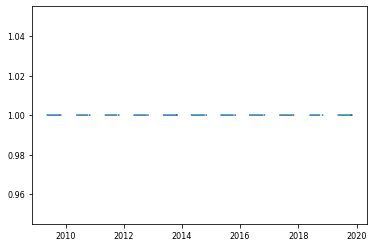

In [57]:
T30['Season'] = np.nan
T30.loc[T30['Season_Sum']>0,'Season']=1#np.nan
# T30.loc[T30['Season_Sum'].isnull(),'Season']=np.nan

for y in T30.index.year.unique():
#     print(y)
    mx = T30.loc[T30.index.year==y,'Season_Sum'].max()
#     print(mx)
    T30.loc[((T30.index.year==y)&(T30['Season_Sum']>=mx)),'Season']=np.nan
#     T30.loc[T30]
plt.figure()
plt.plot(T30['Season'])


print(T30.groupby(T30.index.month).count())

Out = T30[T30.columns[T30.columns.str.contains('ER_')==False]].copy()#[160:2000]
Out = Out.drop(columns=['Daytime.1'])
print(Out.shape)
Out.to_csv(Out_Path+'Upscaled_Estimates.csv')

## Validation

In [35]:
X = 'fch4'
# y = 'NME_FSO'
y = 'NME_est_FP'

X = 'fco2'
# y = 'NEE_FSO'

y = 'NEE_est'


DNA=(T30[[X,y]].dropna())
print('r2',(metrics.r2_score(DNA[X],DNA[y])*100).round(2))
print('RMSE',(metrics.mean_squared_error(DNA[X],DNA[y])**.5).round(2))
print('MAE',(metrics.mean_absolute_error(DNA[X],DNA[y])).round(2))

X2 = sm.add_constant(DNA[X])
est = sm.OLS(DNA[y], X2)
est2 = est.fit()
print(est2.summary())
with open('G:\\My Drive\\PhD_Thesis\\Chapter3_Figs/'+X[0]+'_v_'+y+'_summary.txt', 'w') as fh:
    fh.write(est2.summary().as_text())


r2 66.2
RMSE 7.16
MAE 5.43
                            OLS Regression Results                            
Dep. Variable:             NME_est_FP   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     1645.
Date:                Thu, 03 Mar 2022   Prob (F-statistic):          6.69e-195
Time:                        11:12:36   Log-Likelihood:                -2429.0
No. Observations:                 788   AIC:                             4862.
Df Residuals:                     786   BIC:                             4871.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5725    

count    10.000000
mean      0.033955
std       0.010026
min       0.018775
25%       0.029284
50%       0.032778
75%       0.037543
max       0.052814
Name: Frac, dtype: float64
            Max  Max_Date      Total         CO2       CH4      Frac
2011 -24.980535       247  -8.483462  128.513314  4.290006  0.033382
2010 -14.364858       252   3.443709  174.991985  4.171142  0.023836
2015 -14.443234       238  10.809623   82.244186  4.343625  0.052814
2017  -9.790734       240  13.713013  130.396856  4.292490  0.032919
2018   0.000000       121  16.949960  221.069227  4.150496  0.018775
2019 -34.427528       253  21.407464  128.590960  4.196746  0.032636
2012   0.000000       122  33.778108  139.498777  4.371551  0.031338
2013   0.000000       121  48.442130  154.916768  4.430570  0.028600
2014   0.000000       121  52.284270   90.851469  4.207932  0.046317
2016   0.000000       122  69.480175  112.943273  4.396883  0.038930
NEE
174 256 -2.2928585498171783 8.87101757228884
NME
174 256 -

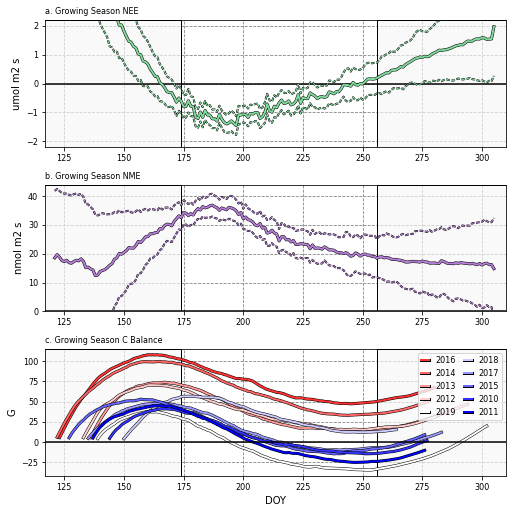

In [54]:

Units = ['umol m2 s',
'nmol m2 s',
'G'
]


Aliases = ['NEE',
'NME','Net C Balance']

Start = 174
End = 256

Yearly = T30[['NEE_est','NME_est','NEE_est_CI','NME_est_CI']].groupby(T30.index.dayofyear).apply(lambda g: g.mean(skipna=False))
# .mean()
import matplotlib.patheffects as pe

fig,axes = plt.subplots(3,figsize=(18.2*cm_2_in, 18.2*cm_2_in))

GS = T30.loc[(#(T30.index.dayofyear>=Start)&(T30.index.dayofyear<=End)&
             (T30.index.year>=2009)&(T30.index.year<=2019))].copy()

nee = All.loc[All['Flux']=='NEE']
nme = All.loc[All['Flux']=='NME']

norm = mpl.colors.Normalize(vmin=0, vmax=10)
Colors = []
for i in range(0,10):
    rgba_color = cm.bwr(norm(i)) 
    Colors.append(rgba_color)

mult = {'fco2':(1e-6 * 12.0107 *3600),
        'fch4':(1e-9 * 12.0107 *3600)
       }

GS['NEE_est_c'] = GS['NEE_est']*mult['fco2']
GS['NME_est_c'] = GS['NME_est']*mult['fch4']
GS['C']=(GS['NEE_est_c']+GS['NME_est_c'])*GS['Season']
GS['Air_Temp']=GS['Air_Temp']*GS['Season']

Yz = GS.loc[GS.index.year>2009].resample('Y').sum()['C'].sort_values(ascending=False)

i = Yz.index.year.shape[0]-1
Mx,Pd,Sm,CO,CH = [],[],[],[],[]
Yix = []
Smin = 200
Emax = 200

ax=axes[2]
for y in Yz.index.year:#[::-1]:
    if y >=2009 and y<=2019:
        Yix.append(y)
        Year = GS.loc[GS.index.year==y,['C','NEE_est_c','NME_est_c']].resample('D').sum().cumsum().copy()
        Year[['Season','Air_Temp']] = GS.loc[GS.index.year==y,['Season','Air_Temp']].resample('D').mean().copy()
        S = (Year.loc[Year['Season'].isnull()==False].index.dayofyear[0])
        if S<Smin:
            Smin=S*1
        E = (Year.loc[Year['Season'].isnull()==False].index.dayofyear[-1])
        if E>Emax:
            Emax=E*1
        Mx.append(Year['C'].min())
        Pd.append(Year.loc[Year['C']==Year['C'].min()].index.dayofyear.values[0])
        Sm.append(Year['C'][-1:].values[0])
        ax.plot(Year.index.dayofyear,Year['C']*Year['Season'],
                color=Colors[i],label=y,lw=2, path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
        Year['C'] = Year['C']*Year['Season']
        
#         GSD.loc[GSD.index.year==y,'C']=Year.loc[Year['C'].isnull()==False,'C'][-1:].values[0]
#         GSD.loc[GSD.index.year==y,'Air_Temp']=Year['Air_Temp'].mean()
        
        CO.append(Year['NEE_est_c'][-1:].values[0])
        CH.append(Year['NME_est_c'][-1:].values[0])
        
        i -=1
Cbal = pd.DataFrame(index=Yix,data={'Max':Mx,'Max_Date':Pd,'Total':Sm,'CO2':CO,'CH4':CH})
Cbal['Frac'] = Cbal['CH4']/Cbal['CO2'].abs()
print(Cbal['Frac'].describe())
print(Cbal.sort_values(by='Total'))

ax.grid()
ax.set_title('c. Growing Season C Balance',loc='left')
ax.set_ylabel('g C $m^{-2}$')
ax.set_xlabel('DOY')
ax.set_xlim(Start,End)
ax.legend(ncol=2,columnspacing=1,handlelength=1)

# ax.legend()
ax=axes[0]
ax.set_title('a. Growing Season NEE',loc='left')

ax=axes[1]
ax.set_title('b. Growing Season NME',loc='left')
j=0
Xl1,Xl2=Smin-5,Emax+5

axes[0].plot([Xl1,Xl2],[0,0],color='k')
axes[1].plot([Xl1,Xl2],[0,0],color='k')
axes[2].plot([Xl1,Xl2],[0,0],color='k')
ax=axes[0]

ax.plot(Yearly['NEE_est']-Yearly['NEE_est_CI'],
        linestyle='--',color='#81db9c',lw=1, path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])
ax.plot(Yearly['NEE_est']+Yearly['NEE_est_CI'],
        linestyle='--',color='#81db9c',lw=1, path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])
ax.plot(Yearly['NEE_est'],
        color='#81db9c',lw=2, path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])

# e
ax=axes[1]
ax.plot(Yearly['NME_est']-Yearly['NME_est_CI'],
        linestyle='--',color='#b57ed6',lw=1, path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])
ax.plot(Yearly['NME_est']+Yearly['NME_est_CI'],
        linestyle='--',color='#b57ed6',lw=1, path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])
ax.plot(Yearly['NME_est'],
        color='#b57ed6',lw=2, path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])

j=0
for ax in axes:#[axes[0],axes[1]]:
    ax.axvspan(Xl1-1,Start,facecolor=[.97,.97,.97,.65],edgecolor='k')
    ax.axvspan(End,Xl2+1,facecolor=[.97,.97,.97,.65],edgecolor='k')
#     ax.set_xlim(Xl1,Xl2)
#     ax.grid()
#     ax.set_title(Aliases[j])
    ax.set_ylabel(Units[j])
    yl = ax.get_ylim()
    print(Aliases[j])
    print(Start,End,yl[0],yl[1])
    ax.set_xlim(Xl1,Xl2)
    ax.set_axisbelow(True)
    ax.grid(color='gray', linestyle='dashed')
    j+=1
axes[0].set_ylim(-2.2,2.2)
axes[1].set_ylim(0,44)

plt.tight_layout()
print(All.loc[((All['Year']==2017)&(All['Flux']=='NEE')),'Estimates'])
print(All.loc[((All['Year']==2017)&(All['Flux']=='NEE')),'95% CI/PI'])
print(All.loc[((All['Year']==2017)&(All['Flux']=='NME_FP')),'Estimates'])
print(All.loc[((All['Year']==2017)&(All['Flux']=='NME_FP')),'95% CI/PI'])
Yearly.columns.values
plt.savefig('G:\\My Drive\\PhD_Thesis\\Chapter3_Figs/Modeled_Fluxes_OLS.jpg',dpi=600)

In [123]:
# T30.loc[T30.index.year==2017,['Season3','Air_Temp']].dropna()
T30['Season'].describe()


count    30432.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Season, dtype: float64

## Satelite

In [208]:
print(T30['Air_Temp'].dropna())

datetime
2009-05-01 00:00:00   -1.0
2009-05-01 01:00:00   -1.3
2009-05-01 02:00:00   -1.1
2009-05-01 03:00:00   -1.4
2009-05-01 04:00:00   -1.2
                      ... 
2019-10-31 19:00:00   -3.7
2019-10-31 20:00:00   -3.9
2019-10-31 21:00:00   -4.0
2019-10-31 22:00:00   -4.1
2019-10-31 23:00:00   -4.3
Name: Air_Temp, Length: 48538, dtype: float64


In [203]:
Coverage = T30.loc[((T30.index.month>=5)&(T30.index.month<=10))].copy()
#     T30['Season'].isnull()==False]
Coverage = Coverage.groupby(Coverage.index.date).mean()
Total = Coverage['DOY'].count()
print(Total)
print('NDVI')
Missing = Coverage.loc[Coverage['ndvi_FI'].isnull()==True,'NDVI_interp'].count()
print(Missing,Missing/Total)


print('NDSI')
Missing = Coverage.loc[Coverage['NDSI_FI'].isnull()==True,'NDSI_interp'].count()
print(Missing,Missing/Total)
# Coverage[['Season','ndvi_FI']]

2024
NDVI
104 0.05138339920948617
NDSI
929 0.4589920948616601


             GPP_interp  NDVI_interp   NEE_est  Season
GPP_interp     1.000000     0.721497  0.305925     NaN
NDVI_interp    0.721497     1.000000  0.055225     NaN
NEE_est        0.305925     0.055225  1.000000     NaN
Season              NaN          NaN       NaN     NaN
             GPP_interp  NDVI_interp   NEE_est  Season
GPP_interp     1.000000     0.203575  0.424287     NaN
NDVI_interp    0.203575     1.000000  0.131883     NaN
NEE_est        0.424287     0.131883  1.000000     NaN
Season              NaN          NaN       NaN     NaN


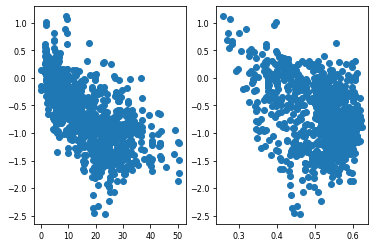

In [206]:
GPP_Daily = T30.loc[((T30.index.dayofyear>=174)&(T30.index.dayofyear<=256)),
                    ['GPP_interp','NDVI_interp','NEE_est','Season']].resample('D').mean().dropna()

CO2 = T30[['GPP_interp','NDVI_interp','NEE_est','Season']].dropna()

CO2['Ix'] = CO2.index.year+CO2.index.month
CO2 = CO2.loc[((CO2.index.month==7)|(CO2.index.month==8))].groupby('Ix').mean()


print(CO2.corr()**2)

print(GPP_Daily.corr()**2)
fig,ax=plt.subplots(1,2)
ax[0].scatter(GPP_Daily['GPP_interp'],GPP_Daily['NEE_est'])
ax[1].scatter(GPP_Daily['NDVI_interp'],GPP_Daily['NEE_est'])


In [124]:

# GPP = pd.read_csv('G:\\My Drive\\earthengine/GPP_Multi_Scale.csv',
#                   parse_dates=['date'],na_values=-9999,index_col=['date']).dropna()
# GPP = GPP.set_index(pd.to_datetime(GPP.index))
# # GPP = GPP.resample('1D').interpolate()/8

# PsnNet = pd.read_csv('G:\\My Drive\\earthengine/PsnNet.csv',
#                   parse_dates=['date'],na_values=-9999,index_col=['date']).dropna()
# PsnNet = PsnNet.set_index(pd.to_datetime(PsnNet.index))

# NDVI = pd.read_csv('G:\\My Drive\\earthengine/NDVI_NBAR_FP_New.csv',
#                   parse_dates=['date'],na_values=-9999,index_col=['date']).dropna()
# NDVI = NDVI.set_index(pd.to_datetime(NDVI.index))

# GPP['RSMP_Key'] = GPP.index.copy()
# NDVI['RSMP_Key2'] = NDVI.index.copy()

# Test = T30.join(NDVI,how='outer',rsuffix='R').join(GPP,how='outer',rsuffix='R').join(PsnNet,how='outer',rsuffix='R')
# Test = Test.loc[((Test.index.year>2008)&(Test.index.year<2020))]


# Test['RSMP_Key']=Test['RSMP_Key'].ffill()


# Test2 = Test.groupby('RSMP_Key').mean()

# print(GPP)

# Test2['ndvi_diff']=Test2['NDVI_interp'].diff()

# Test3=Test2.loc[((Test2.index.dayofyear>=174)&
#           (Test2.index.dayofyear<=256-7))]

# y = 'NEE_est'

# for X,y in zip(['ndvi_diff','GPP_FI','ndvi_diff'],['NEE_est','NEE_est','NME_est']):
#     DNA = Test3[[X,y]].dropna()
#     X2 = sm.add_constant(DNA[X])
#     est = sm.OLS(DNA[y], X2)
#     est2 = est.fit()
#     print()
#     print(X)
#     print(stats.pearsonr(DNA[X], DNA[y]))
#     print(est2.summary())
#     with open('G:\\My Drive\\PhD_Thesis\\Chapter3_Figs/'+X+'v'+y+'_summary.txt', 'w') as fh:
#         fh.write(est2.summary().as_text())


# Test['RSMP_Key']=Test['RSMP_Key'].ffill()

# Test4 = Test.groupby('RSMP_Key').mean()

# X = ['NDVI_interp','ndvi_diff']
# X = ['NDVI_interp']
# # X = ['ndvi_diff']
# # X = ['GPP_FIR']
# DNA = Test3[X+[y]].dropna()
# X2 = sm.add_constant(DNA[X])
# est = sm.OLS(DNA[y], X2)
# est2 = est.fit()
# print(metrics.mean_squared_error(DNA[y],est2.predict(X2)))
# print()
# print(X)
# print(est2.summary())
# # with open('G:\\My Drive\\PhD_Thesis\\Chapter3_Figs/'+X+'v'+y+'_summary.txt', 'w') as fh:
# #     fh.write(est2.summary().as_text())

In [125]:

# # T30.loc[((T30.index.month==7)&(T30.index.year<2016)),['NEE_est','NME_est']].mean()
# T30.columns.str.contains('ndvi')

In [126]:

# GS = T30.loc[((T30.index.dayofyear>=Start)&(T30.index.dayofyear<=End)&
#              (T30.index.year>2008)&(T30.index.year<2020))].copy()


# Non_Inputs=['NEE_est','NME_est',
#             'GPP_FI','NDVI_interp',
# #             'ndvi_diff'#,'GPP_diff'
#            ]

# Sat_Data = ['GPP_FI',
#        'GPP_FP', 'NDVI_interp', 'ndvi_FP']

# BU = T30[Sat_Data].copy()
# T30[Sat_Data]=T30[Sat_Data].interpolate()
# # T30['ndvi_diff']=T30['NDVI_interp'].diff(24)
# # T30['GPP_diff']=T30['GPP_FI'].diff(24)
# # GS['ndvi_diff']=T30['NDVI_interp'].diff(24)
# # GS['GPP_diff']=T30['GPP_FI'].diff(24)

# Annual = GS[Non_Inputs].groupby(GS.index.year).mean()
# Annual['NDVI_interp_max'] = GS['NDVI_interp'].groupby(GS.index.year).max()

# Day8 = GS[Non_Inputs].resample('8D').mean()
# Day8['ndvi_diff'] = Day8['NDVI_interp'].diff()

# D8 = Day8.copy()
# D8 = D8.loc[((D8.index.dayofyear>=Start)&(D8.index.dayofyear<=End)&
#         (D8.index.year>=2009)&(D8.index.year<=2018)),Non_Inputs
#        ].corr()[['NEE_est','NME_est']][2:]

# # D = GS.resample('D').mean()

# Day = GS[Non_Inputs].resample('D').mean()
# Day['ndvi_diff']=Day['NDVI_interp'].diff()
# D = Day.corr()[['NEE_est','NME_est']][2:]

# L7 = pd.read_csv('FP_Landsat7.csv',parse_dates=['system:time_start'],index_col=['system:time_start']).resample('Y').max()
# L7.index=L7.index.year
# L8 = pd.read_csv('FP_Landsat8.csv',parse_dates=['system:time_start'],index_col=['system:time_start']).resample('Y').max()
# L8.index=L8.index.year

# print((Annual.join(L8).corr()**2)[['NEE_est','NME_est','NDVI_LS8']].round(2))
# # print((Annual.join(L7).corr()**2)[['NEE_est','NME_est','NDVI_LS7']].round(2))

# Annual= Annual.join(L7,how='inner')#.join(L8,how='outer').

# A = Annual.corr()[['NEE_est','NME_est']][2:]
# print((A**2).round(2)*np.sign(A))
# print((D8**2).round(2)*np.sign(D8))
# print((D**2).round(2)*np.sign(D))

# Annual= Annual.join(L8,how='outer')

In [127]:
# fig,axes=plt.subplots(2,figsize=(18.2*cm_2_in, 12.2*cm_2_in),sharex=True)
# Yearly = T30[['NEE_est','NME_est']].groupby(T30.index.dayofyear).mean()
# Annual_S = T30[['NEE_est','NME_est']].groupby(T30.index.dayofyear).std()#.rolling(8).mean()
# ax=axes[0]
# ax.plot(Yearly['NEE_est']+Annual_S['NEE_est']/11**.5*stats.t.ppf(1-0.025,11),color='grey')
# ax.plot(Yearly['NEE_est']-Annual_S['NEE_est']/11**.5*stats.t.ppf(1-0.025,11),color='grey')
# ax.plot(Yearly['NEE_est'],color='red')

# ax=axes[1]
# ax.plot(Yearly['NME_est']+Annual_S['NME_est']/10**.5*stats.t.ppf(1-0.025,10),color='grey')
# ax.plot(Yearly['NME_est']-Annual_S['NME_est']/10**.5*stats.t.ppf(1-0.025,10),color='grey')
# ax.plot(Yearly['NME_est'],color='purple')

# Variables = ['NEE_est',
# 'NME_est','C']

# Aliases = ['NEE',
# 'NME','Net C Balance']

# Units = ['umol m2 s',
# 'nmol m2 s',
# 'G'
# ]

# j=0
# Xl1,Xl2=Start-35,End+35

# axes[0].plot([Xl1,Xl2],[0,0],color='k')
# axes[1].plot([Xl1,Xl2],[0,0],color='k')
# for ax in axes:
# #     for ax in axe:
#     ax.axvspan(Xl1-1,Start,facecolor=[.97,.97,.97],edgecolor='k')
#     ax.axvspan(End,Xl2+1,facecolor=[.97,.97,.97],edgecolor='k')
#     ax.set_xlim(Xl1,Xl2)
#     ax.grid()
#     ax.set_title(Aliases[j])
#     ax.set_ylabel(Units[j])
#     yl = ax.get_ylim()
#     print(Aliases[j])
#     print(Start,End,yl[0],yl[1])
#     ax.set_xlim(Xl1,Xl2)
#     j+=1
# plt.tight_layout()

# plt.savefig('G:\\My Drive\\PhD_Thesis\\Chapter3_Figs/Fluxes.png')

In [128]:
X=['NEE_est']
y='NME_est'
DNA = GS[X+[y]].resample('D').mean().dropna()

X2 = sm.add_constant(DNA[X])
est = sm.OLS(DNA[y], X2)
est2 = est.fit()
print(est2.summary())

with open('G:\\My Drive\\PhD_Thesis\\Chapter3_Figs/'+X[0]+'_v_'+y+'_summary.txt', 'w') as fh:
    fh.write(est2.summary().as_text())

# stats.spearmanr(DNA[y],DNA[X[0]])

                            OLS Regression Results                            
Dep. Variable:                NME_est   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     1208.
Date:                Sat, 26 Feb 2022   Prob (F-statistic):          5.87e-208
Time:                        11:39:36   Log-Likelihood:                -6633.5
No. Observations:                2024   AIC:                         1.327e+04
Df Residuals:                    2022   BIC:                         1.328e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.7500      0.153    161.944      0.0

In [129]:
T30['DSF_S']=T30['Season3']*T30['DOY']
GSD = T30.resample('Y').min()[['DSF_S']]
GSD = GSD.rename(columns={'DSF_S':'Start'})
GSD['End'] = T30.resample('Y').max()[['DSF_S']]
GSD['Duration']=GSD['End']-GSD['Start']
GSD.sort_values(by='Start')

,Start,End,Duration
datetime,,,
2015-12-31,137.0,270.0,133.0
2016-12-31,141.0,281.0,140.0
2011-12-31,144.0,271.0,127.0
2019-12-31,145.0,279.0,134.0
2014-12-31,147.0,275.0,128.0
2017-12-31,148.0,284.0,136.0
2012-12-31,149.0,281.0,132.0
2010-12-31,154.0,266.0,112.0
2009-12-31,156.0,267.0,111.0


In [130]:
# fig,ax=plt.subplots(2,2)
# ax[0,0].scatter(GSD['Air_Temp'],GSD['C'],label=str((GSD[['Air_Temp','C']].corr()**2).round(3)['C'][0]))
# ax[0,0].legend()
# ax[0,1].scatter(GSD['Duration'],GSD['C'],label=str((GSD[['Duration','C']].corr()**2).round(3)['C'][0]))
# ax[0,1].legend()
# ax[1,0].scatter(GSD['Start'],GSD['C'],label=str((GSD[['Start','C']].corr()**2).round(3)['C'][0]))
# ax[1,0].legend()
# ax[1,1].scatter(GSD['End'],GSD['C'],label=str((GSD[['End','C']].corr()**2).round(3)['C'][0]))
# ax[1,1].legend()


# GSD


datetime
2013-09-03      4.758750
2009-08-28      9.788333
2018-09-03      9.859583
2016-09-09     10.878750
2015-08-31     11.672917
                 ...    
2018-06-30    217.743750
2017-06-23    218.117500
2016-06-23    223.183750
2011-06-25    226.035417
2016-07-27    250.821818
Name: NR_Wm2_Avg, Length: 913, dtype: float64
datetime
2016-07-27    250.821818
Name: NR_Wm2_Avg, dtype: float64


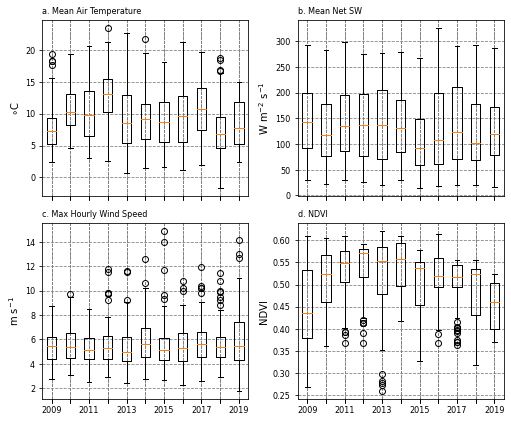

In [131]:

fig,axes = plt.subplots(2,2,figsize=(18.2*cm_2_in, 15*cm_2_in),sharex=True)#, 23.7*cm_2_in))

GS = T30.loc[((T30.index.dayofyear>=Start)&(T30.index.dayofyear<=End)&
             (T30.index.year>2008)&(T30.index.year<2020))].copy()

GS_y = GS.resample('Y').mean()
GS_y['Rainfall'] = GS['Rainfall'].resample('Y').sum()
GS_y['wind_speed'] = GS['wind_speed'].resample('Y').max()
GS_y['NDVI_mx'] = GS['NDVI_interp'].resample('Y').max()
GS_y['NDVI_mn'] = GS['NDVI_interp'].resample('Y').min()
GS_y['Active_Layer_1'] = GS['Active_Layer_1'].resample('Y').median()


Bx_A = []
Bx_R = []
Bx_W = []
Bx_Rn = []
Bxl = []
Bxt = []
Bx_N = []
i = 0
for y in range(2009,2020):
    Bx_A.append(GS.loc[GS.index.year==y,'Air_Temp'].resample('D').mean())
    Bx_R.append(GS.loc[GS.index.year==y,'Net_SW'].resample('D').mean())
    Bx_W.append(GS.loc[GS.index.year==y,'wind_speed'].resample('D').max())
    Bx_Rn.append(GS.loc[GS.index.year==y,'Rainfall'].resample('D').sum())
    Bx_N.append(GS.loc[GS.index.year==y,'NDVI_interp'].resample('D').mean())
#     print(y)
    Bxt.append(y-2008)
    if i == 0:
#         print('-')
        Bxl.append(y)
        i = 1
    elif i == 1:
        Bxl.append('')
        i = 0
    
GS = T30.resample('D').mean()

GS = GS.loc[((GS.index.dayofyear>=Start)&(GS.index.dayofyear<=End)&
             (GS.index.year>2008)&(GS.index.year<2020))]
    
ax = axes[0,0]
ax.boxplot(Bx_A)#,vert=False)
y1=ax.get_ylim()[1]
y0=ax.get_ylim()[0]
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
# ax.set_xticklabels(Bxl)
ax.set_ylabel('$\circ$C')
ax.set_title('a. Mean Air Temperature',loc='left')

ax = axes[0,1]
ax.boxplot(Bx_R)#,vert=False)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
# ax.set_xticklabels(Bxl)
ax.set_ylabel('W m$^{-2}$ s$^{-1}$')
ax.set_title('b. Mean Net SW',loc='left')

ax = axes[1,0]
ax.boxplot(Bx_W)#,vert=False)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
ax.set_xticklabels(Bxl)
ax.set_ylabel('m s$^{-1}$')
ax.set_title('c. Max Hourly Wind Speed',loc='left')


ax = axes[1,1]
ax.boxplot(Bx_N)#,vert=False)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
ax.grid(color='gray', linestyle='dashed')
ax.set_xticklabels(Bxl)
ax.set_ylabel('NDVI')
ax.set_title('d. NDVI',loc='left')
# ax.set_ylabel('NDVI')



plt.tight_layout()

print(GS.resample('D').mean()['NR_Wm2_Avg'].sort_values().dropna())
print(GS.loc[((GS.index.month==7)&(GS.index.day==27)&(GS.index.year==2016)),'NR_Wm2_Avg'])


plt.savefig('G:\\My Drive\\PhD_Thesis\\Chapter3_Figs/AWS_Data_OLS.jpg',dpi=600)
# print(T30)

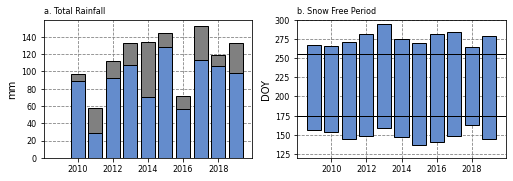

In [132]:

fig,axes = plt.subplots(1,2,figsize=(18.2*cm_2_in, 6.5*cm_2_in),sharex=True)#, 23.7*cm_2_in))


ax = axes[0]

# print(GS_y.index)
GS_y.loc[GS_y.index=='2009-12-31','Rainfall']*= 0
Ann = T30.resample('Y').sum()
Ann.loc[Ann.index=='2009-12-31','Rainfall']*= 0
ax.bar(Ann.index.year,Ann['Rainfall'],edgecolor='k',facecolor = 'grey')
ax.bar(GS_y.index.year,GS_y['Rainfall'],edgecolor='k',facecolor = '#648ccc')
# ax.set_yticks(GS_y.index.year)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

ax.set_ylabel('mm')
ax.set_title('a. Total Rainfall',loc='left')

# Day = T30.copy()
# Day = T30.resample('D').mean()
# Day['FSDOY'] = Day.index.dayofyear
# Day['LSDOY'] = Day.index.dayofyear
# Day.loc[Day.index.dayofyear<=200,'LSDOY']=np.nan
# Day.loc[Day.index.dayofyear>=200,'FSDOY']=np.nan
# Day.loc[Day['snow_cover']<25,'LSDOY']= np.nan
# Day.loc[Day['snow_cover']<25,'FSDOY']= np.nan
# FS = Day.resample('Y').max()['FSDOY'].values
# LS = Day.resample('Y').min()['LSDOY'].values
# Y = Day.resample('Y').max().index.year.values

# print(LS.max(),LS.min(),np.median(LS))

# print(FS.max(),FS.min(),np.median(FS))

ax=axes[1]
ax.set_title('b. Snow Free Period',loc='left')
GSD
ax.bar(GSD.index.year,GSD.End-GSD.Start,bottom = GSD.Start,edgecolor='k',facecolor = '#648ccc')
# ax.set_yticks(GS_y.index.year)
ax.set_ylim(120,300)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
# ax.set_yticklabels([])
ax.set_ylabel('DOY')

ax.axhspan(Start,End,-50,10,facecolor='None',edgecolor='k')
plt.tight_layout()

plt.savefig('G:\\My Drive\\PhD_Thesis\\Chapter3_Figs/Rain_Snow_OLS.jpg',dpi=600)

# plt.figure()
# plt.plot(Day['snow_cover'])

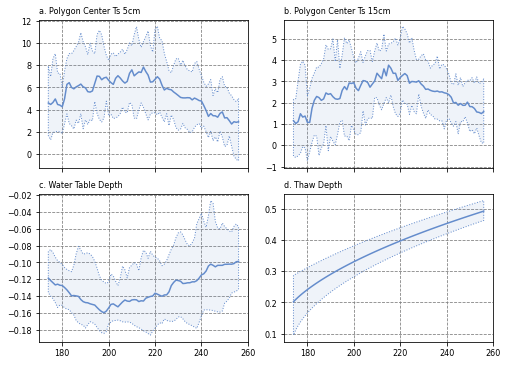

In [133]:
# print((GS_y[['Air_Temp','Rainfall','NR_Wm2_Avg','Temp_5_1','Temp_5_2','Temp_15_1','Temp_15_2','Table_1','Active_Layer_1']].corr()**2).round(2))#,'NR_Wm2_Avg']])


GS_d = GS.groupby(GS.index.dayofyear).mean()
GS_d_mx = GS.groupby(GS.index.dayofyear).max()
GS_d_mn = GS.groupby(GS.index.dayofyear).min()
# print((GS_d[['Air_Temp','Rainfall','NR_Wm2_Avg','Temp_5_1','Temp_5_2','Temp_15_1','Temp_15_2','Table_1','Active_Layer_1']].corr()**2).round(2))#,'NR_Wm2_Avg']])

fig,axes = plt.subplots(2,2,figsize=(18.2*cm_2_in, 13*cm_2_in),sharex=True)


ax = axes[0,0]
ax.plot(GS_d['Temp_5_1'],color='#648ccc')
ax.fill_between(GS_d.index,GS_d_mn['Temp_5_1'],GS_d_mx['Temp_5_1'],facecolor='#648ccc1A',edgecolor='#648ccc',linestyle=':')
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
ax.set_title('a. Polygon Center Ts 5cm',loc='left')

ax = axes[0,1]
ax.plot(GS_d['Temp_15_1'],color='#648ccc')
ax.fill_between(GS_d.index,GS_d_mn['Temp_15_1'],GS_d_mx['Temp_15_1'],facecolor='#648ccc1A',edgecolor='#648ccc',linestyle=':')
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
ax.set_title('b. Polygon Center Ts 15cm',loc='left')

ax = axes[1,0]
ax.plot(GS_d['Table_1'],color='#648ccc')
ax.fill_between(GS_d.index,GS_d_mn['Table_1'],GS_d_mx['Table_1'],facecolor='#648ccc1A',edgecolor='#648ccc',linestyle=':')
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
ax.set_title('c. Water Table Depth',loc='left')

ax = axes[1,1]
ax.plot(GS_d['Active_Layer_1'],color='#648ccc')
ax.fill_between(GS_d.index,GS_d_mn['Active_Layer_1'],GS_d_mx['Active_Layer_1'],facecolor='#648ccc1A',edgecolor='#648ccc',linestyle=':')
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
ax.set_title('d. Thaw Depth',loc='left')

plt.tight_layout()

plt.savefig('G:\\My Drive\\PhD_Thesis\\Chapter3_Figs/Drivers_OLS.jpg',dpi=600)

In [134]:
print(GS.resample('Y').max()['Active_Layer_1'].sort_values().round(2))

datetime
2013-12-31    0.46
2009-12-31    0.47
2018-12-31    0.48
2011-12-31    0.48
2012-12-31    0.49
2010-12-31    0.49
2017-12-31    0.49
2014-12-31    0.50
2016-12-31    0.51
2015-12-31    0.52
2019-12-31    0.53
Name: Active_Layer_1, dtype: float64


In [135]:
A = GS.groupby(GS.index.year).mean()[['NEE_est','NME_est']]
print(((A['NME_est']*1e-3)/A['NEE_est']).sort_values())#+A['NME_est']*1e-3))

datetime
2013   -0.064046
2012   -0.049307
2016   -0.042492
2015   -0.042470
2017   -0.042191
2018   -0.041697
2009   -0.041375
2010   -0.039385
2011   -0.038175
2014   -0.036442
2019   -0.030864
dtype: float32


# Annual Correlation (DOY 174-256)

- R2 (w/ sign indicating direction of correlation)

### Non-inputs

## Inputs NEE

In [136]:

V =  ['VPD', 'wind_speed', 'PPFD_Avg', 'Active_Layer_1', 'Temp_5_1',
       'Temp_5_2', 'Temp_15_2','Daytime','NDVI_interp','Air_Temp']
# T30['ndvi_diff'] = T30['NDVI_interp'].diff(24)
GS = T30.loc[((T30.index.dayofyear>=Start)&(T30.index.dayofyear<=End)&
             (T30.index.year>2008)&(T30.index.year<2020))].copy()

H = GS[V+['NEE_est']].resample('H').mean()
# H['GPP_Sum'] = GS[['GPP_FIR']].resample('H').sum()

# D8 = GS[V+['NEE_est']].resample('8D').mean()
# D['GPP_Sum']8 = GS[V+['NGPP_FIR]].resample('8D').sum()

D = GS[V+['NEE_est']].resample('D').mean()
# D['GPP_Sum'] = GS[['GPP_FIR']].resample('D').sum()

A = GS[V+['NEE_est']].resample('Y').mean()
# A['GPP_Sum'] = GS[['GPP_FIR']].resample('Y').sum()
# V.append('GPP_Sum')

# A['NDVI_interpR']= GS[V+['NEE_est']].resample('Y')['NDVI_interpR'].median()
# (V**2*np.sign(V)).round(2)[:-1].sort_values(by='NEE_est')

# print((GS['NEE_est']-GS['NEE']).diff().max())
# Corrs = (A.corr()[['NEE']].join(D8.corr()[['NEE']],rsuffix='8').join(D.corr()[['NEE']],rsuffix='1').join(H.corr()[['NEE']],rsuffix='H'))[:-1]

# (Corrs**2*np.sign(Corrs)).round(2)

NEE_Corr = {
'Hourly':[],
'Daily':[],
# 'Daily8':[],
'GS':[],
'Hourly_p':[],
'Daily_p':[],
# 'Daily8_p':[],
'GS_p':[]
}
for v in V:
    r = (stats.spearmanr(A['NEE_est'],A[v]))
    
    NEE_Corr['GS'].append(r[0])
    NEE_Corr['GS_p'].append(r[1])
# print()

# for v in V:
#     DNA = D8[['NEE_est',v]].dropna()
#     r = (stats.pearsonr(DNA['NEE_est'],DNA[v]))
    
#     NEE_Corr['Daily8'].append(r[0])
#     NEE_Corr['Daily8_p'].append(r[1])

for v in V:
    DNA = D[['NEE_est',v]].dropna()
    r = (stats.pearsonr(DNA['NEE_est'],DNA[v]))
    
    NEE_Corr['Daily'].append(r[0])
    NEE_Corr['Daily_p'].append(r[1])
        
for v in V:
    DNA = H[['NEE_est',v]].dropna()
    r = (stats.pearsonr(DNA['NEE_est'],DNA[v]))
    NEE_Corr['Hourly'].append(r[0])
    NEE_Corr['Hourly_p'].append(r[1])
    
df = pd.DataFrame(data=NEE_Corr,index=V)
        
V = ['Hourly','Daily','GS']
df[V] = df[V].round(2)

for v in V:
    df.loc[df[v+'_p']>0.05,v]='--'
df[V].to_csv('G:\\My Drive\\PhD_Thesis\\Chapter3_Figs/Table4_OLS.csv')
df[V]

# print(GS['Active_Layer_1'].describe())

,Hourly,Daily,GS
VPD,-0.47,-0.42,--
wind_speed,-0.19,0.12,--
PPFD_Avg,-0.82,-0.69,--
Active_Layer_1,0.2,0.47,--
Temp_5_1,-0.05,-0.35,--
Temp_5_2,-0.4,-0.45,--
Temp_15_2,0.4,--,--
Daytime,-0.49,-0.68,--
NDVI_interp,-0.16,-0.36,--
Air_Temp,-0.46,-0.43,--


In [137]:
# print(GS)

In [138]:
V = (T30.loc[((T30['DOY']>=Start)&(T30['DOY']<=End)&
        (T30.index.year>=2009)&(T30.index.year<=2018)),
        fch4.Model_Selection.split('+')+['NME_est']
       ].resample('Y').mean().corr()[['NME_est']]).round(4).sort_values(by='NME_est')


V =   ['u*', 'wind_speed', 'NR_Wm2_Avg', 'Table_1', 'Active_Layer_1', 'Temp_15_1','NDVI_interp','Air_Temp']
GS = T30.loc[((T30.index.dayofyear>=Start)&(T30.index.dayofyear<=End)&
             (T30.index.year>2008)&(T30.index.year<2020))].copy()
H = GS[V+['NME_est']].resample('H').mean()
# D8 = GS[V+['NME_est']].resample('8D').mean()
D = GS[V+['NME_est']].resample('D').mean()
A = GS[V+['NME_est']].resample('Y').mean()
# A['NDVI_interpR']= GS[V+['NEE_est']].resample('Y')['NDVI_interpR'].median()
# (V**2*np.sign(V)).round(2)[:-1].sort_values(

NME_Corr = {
'Hourly':[],
'Daily':[],
# 'Daily8':[],
'GS':[],
'Hourly_p':[],
'Daily_p':[],
# 'Daily8_p':[],
'GS_p':[]
}
for v in V:
    r = (stats.spearmanr(A['NME_est'],A[v]))
    
    NME_Corr['GS'].append(r[0])
    NME_Corr['GS_p'].append(r[1])
# print()

# for v in V:
#     DNA = D8[['NME_est',v]].dropna()
#     r = (stats.pearsonr(DNA['NME_est'],DNA[v]))
    
#     NME_Corr['Daily8'].append(r[0])
#     NME_Corr['Daily8_p'].append(r[1])

for v in V:
    DNA = D[['NME_est',v]].dropna()
    r = (stats.pearsonr(DNA['NME_est'],DNA[v]))
    
    NME_Corr['Daily'].append(r[0])
    NME_Corr['Daily_p'].append(r[1])
        
for v in V:
    DNA = H[['NME_est',v]].dropna()
    r = (stats.pearsonr(DNA['NME_est'],DNA[v]))
    NME_Corr['Hourly'].append(r[0])
    NME_Corr['Hourly_p'].append(r[1])
    
df = pd.DataFrame(data=NME_Corr,index=V)
        
V = ['Hourly','Daily','GS']
df[V] = df[V].round(2)
for v in V:
    df.loc[df[v+'_p']>0.05,v]='--'
df[V].to_csv('G:\\My Drive\\PhD_Thesis\\Chapter3_Figs/Table5_OLS.csv')
df[V]
# stats.spearmanr(A['Active_Layer_1'],A['NDVI_interpR'])

# Sel = (GS.loc[(((GS.index.year == 2013)|(GS.index.year == 2014))&
#               (GS.index.month == 7))])
# print(Sel.groupby(Sel.index.hour).mean()['NME_est'])
# # print(Sel.mean()[''])
# print(Sel.index)

,Hourly,Daily,GS
u*,0.14,--,-0.62
wind_speed,0.14,--,-0.62
NR_Wm2_Avg,0.75,0.75,0.74
Table_1,-0.37,-0.46,--
Active_Layer_1,-0.65,-0.83,-0.68
Temp_15_1,-0.36,--,--
NDVI_interp,0.07,0.08,--
Air_Temp,0.49,0.44,--


In [139]:

mod = [fch4,fco2]
var = ['NME_est','NEE_est']
time = ['Y']
Ests = {'Y':{},'D':{},'8D':{}}

for m,v in zip(mod,var):
    for TSC in Ests.keys():
        X = m.Model_Selection.split('+')

        if v == 'NEE_est':
            X.remove('Daytime')
#             X = ['PPFD_Avg']
        else:
            X.remove('Rim')
            X.remove('Polygon')
#             X = ['Table_1','Active_Layer_1']

        Scale = GS[X+[v]].copy()
        if v == 'NME_est':
            Scale = Scale.loc[Scale.index.year>=2010].copy()
#         else:  
#             Scale = GS[X+[v]].copy()
        Scale = Scale.resample(TSC).mean()
        Scale = Scale.dropna()

        DNA = Scale[[v]+X].dropna()
        X2 = sm.add_constant(DNA[X], has_constant='add')
        est = sm.OLS(DNA[v], X2)
        est2 = est.fit()
        Ests[TSC][v]=est2.pvalues.round(2)

print(Ests)

{'Y': {'NME_est': const             0.17
u*                0.03
wind_speed        0.60
NR_Wm2_Avg        0.89
Table_1           0.26
Active_Layer_1    0.06
Temp_15_1         0.81
dtype: float64, 'NEE_est': const             0.13
VPD               0.48
wind_speed        0.40
PPFD_Avg          0.70
Active_Layer_1    0.07
Temp_5_1          0.80
Temp_5_2          0.63
Temp_15_2         0.29
dtype: float64}, 'D': {'NME_est': const             0.00
u*                0.00
wind_speed        0.82
NR_Wm2_Avg        0.00
Table_1           0.00
Active_Layer_1    0.00
Temp_15_1         0.09
dtype: float64, 'NEE_est': const             0.44
VPD               0.00
wind_speed        0.00
PPFD_Avg          0.00
Active_Layer_1    0.56
Temp_5_1          0.00
Temp_5_2          0.00
Temp_15_2         0.00
dtype: float64}, '8D': {'NME_est': const             0.00
u*                0.00
wind_speed        0.72
NR_Wm2_Avg        0.00
Table_1           0.00
Active_Layer_1    0.00
Temp_15_1         0.58
dtype: f

In [140]:
A = GS[fch4.Model_Selection.split('+')+['Air_Temp','NME_est']].resample('Y').mean()
D8 = GS[fch4.Model_Selection.split('+')+['Air_Temp','NME_est']].resample('8D').mean()
D = GS[fch4.Model_Selection.split('+')+['Air_Temp','NME_est']].resample('D').mean()

GS = T30.loc[((T30.index.dayofyear>=Start)&(T30.index.dayofyear<=End)&
             (T30.index.year>2008)&(T30.index.year<2020))].copy()

H = GS[fch4.Model_Selection.split('+')+['Air_Temp','NME_est']].resample('H').mean()

Corrs = (A.corr()[['NME_est']].join(D8.corr()[['NME_est']],rsuffix='8').join(D.corr()[['NME_est']],rsuffix='1').join(H.corr()[['NME_est']],rsuffix='H'))[:-1]

(Corrs**2*np.sign(Corrs)).round(2)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sign
  if sys.path[0] == '':


,NME_est,NME_est8,NME_est1,NME_estH
u*,-0.35,0.01,0.00,0.02
wind_speed,-0.35,0.01,0.00,0.02
NR_Wm2_Avg,0.27,0.76,0.56,0.57
Table_1,-0.24,-0.23,-0.21,-0.13
Active_Layer_1,-0.50,-0.71,-0.69,-0.42
Temp_15_1,0.04,0.00,-0.00,-0.13
Polygon,NaN,-0.00,0.00,0.00
Rim,-0.00,-0.00,-0.00,0.00
Air_Temp,0.17,0.27,0.19,0.24


In [141]:
V = (T30.loc[((T30['DOY']>=Start)&(T30['DOY']<=End)&
        (T30.index.year>=2009)&(T30.index.year<=2018)),
        fch4.Model_Selection.split('+')+['NME_est']
       ].resample('Y').mean().corr()[['NME_est']]).round(4).sort_values(by='NME_est')

V**2*np.sign(V).sort_values(by='NME_est')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sign
  


,NME_est
Active_Layer_1,-0.333853
u*,-0.232806
wind_speed,-0.232806
Table_1,-0.196072
Rim,0.000000
Temp_15_1,0.024492
NR_Wm2_Avg,0.365178
NME_est,1.000000
Polygon,NaN


# 8 Day Correlation (Matches resolution of GPP data)

In [142]:
# D8 = GS.resample('8D').mean()

# D8 = GS[Non_Inputs].resample('8D').mean()
# D8['Rainfall'] = GS['Rainfall'].resample('8D').sum()
# # D8['ndvi_Max'] = GS['NDVI_interp'].groupby(GS.index.year).sum()

# D8 = D8.loc[((D8.index.dayofyear>=Start)&(D8.index.dayofyear<=End)&
#         (D8.index.year>=2009)&(D8.index.year<=2018)),Non_Inputs
#        ].corr()[['NEE_est','NME_est']][2:]

# D8**2*np.sign(D8)

## Inputs NEE

In [143]:
D8 = GS[fco2.Model_Selection.split('+')+['NEE_est']].resample('8D').mean()
D = GS[fco2.Model_Selection.split('+')+['NEE_est']].resample('D').mean()


D8 = GS[fco2.Model_Selection.split('+')+['NEE_est']].resample('8D').mean()
D8['Rainfall'] = GS['Rainfall'].resample('8D').sum()

D8 = D8.corr()[['NEE_est']].sort_values(by='NEE_est')

(D8**2*np.sign(D8)).round(2)

,NEE_est
Daytime,-0.51
PPFD_Avg,-0.46
VPD,-0.32
Temp_5_2,-0.31
Temp_5_1,-0.22
Temp_15_2,-0.02
wind_speed,-0.00
Rainfall,0.03
Active_Layer_1,0.19
NEE_est,1.00


## Inputs NME

In [144]:
D8 = GS.resample('8D').mean()

D8 = GS[fch4.Model_Selection.split('+')+['NME_est']].resample('8D').mean()
D8['Rainfall'] = GS['Rainfall'].resample('8D').sum()

D8 = D8.corr()[['NME_est']].sort_values(by='NME_est')


D8**2*np.sign(D8)

,NME_est
Active_Layer_1,-7.145958e-01
Table_1,-2.326891e-01
Rainfall,-5.712275e-02
Polygon,-3.835206e-04
Rim,-2.182224e-08
Temp_15_1,2.735883e-05
wind_speed,1.094988e-02
u*,1.094988e-02
NR_Wm2_Avg,7.595620e-01
NME_est,1.000000e+00


# Daily Correlation

In [145]:
# D = GS.resample('D').mean()
# # D = GS[fco2.Model_Selection.split('+')+['NEE_est']].resample('D').mean()


# D = GS[Non_Inputs].resample('D').mean()
# D['Rainfall'] = GS['Rainfall'].resample('8D').sum()

# D = D.corr()[['NEE_est','NME_est']][2:]

# D**2*np.sign(D)

## Inputs NEE

In [146]:
D = GS[fco2.Model_Selection.split('+')+['NEE_est']].resample('D').mean()

# D = GS[Non_Inputs].resample('D').mean()
# D['Rainfall'] = GS['Rainfall'].resample('8D').sum()


D = D.corr()[['NEE_est']].round(4).sort_values(by='NEE_est')


D**2*np.sign(D)

,NEE_est
PPFD_Avg,-0.479695
Daytime,-0.461992
Temp_5_2,-0.200167
VPD,-0.178506
Temp_5_1,-0.119993
Temp_15_2,0.000090
wind_speed,0.013830
Active_Layer_1,0.220712
NEE_est,1.000000


## Inputs NME

In [147]:
# D = GS[fch4.Model_Selection.split('+')+['NME_est']].resample('D').mean()

# D = GS[Non_Inputs].resample('D').mean()
# D['Rainfall'] = GS['Rainfall'].resample('8D').sum()


# D = D.corr()[['NME_est']].round(4).sort_values(by='NME_est')

# D**2*np.sign(D)